# This notebook will demonstrate how to do basic SuperDARN data plotting.

In [1]:
%pylab inline
import datetime
import os
import matplotlib.pyplot as plt
from davitpy import pydarn

Populating the interactive namespace from numpy and matplotlib


In [2]:
sTime = datetime.datetime(2008,2,22)
eTime = datetime.datetime(2008,2,23)
radar = 'bks'
beam  = 7

## Remote File RTI Plots

In [3]:
#The following command will print the docstring for the plotRti routine:
#pydarn.plotting.rti.plotRti?

/home/w2naf/code/matplotlib/lib/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


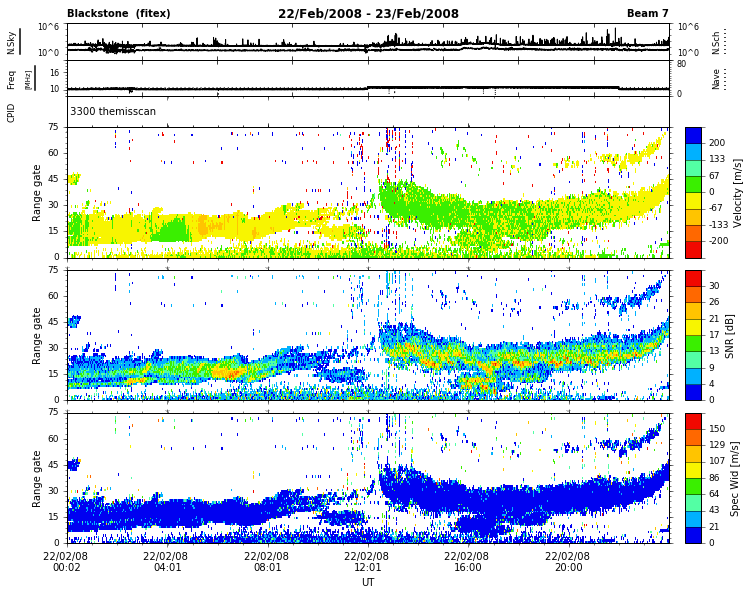

In [4]:
fig = plt.figure(figsize=(14,12)) #Define a figure with a custom size.
pydarn.plotting.rti.plotRti(sTime, radar, eTime=eTime, bmnum=beam)

In [5]:
#Now save as a PNG to your home folder...
home = os.getenv('HOME')
filename = os.path.join(home,'rti.png')
fig.savefig(filename)

In [6]:
fig.clear() #Clear the figure from memory.

## Local File RTI Plot

You can also plot data stored in a local file.  Just change the variables in the cell below.

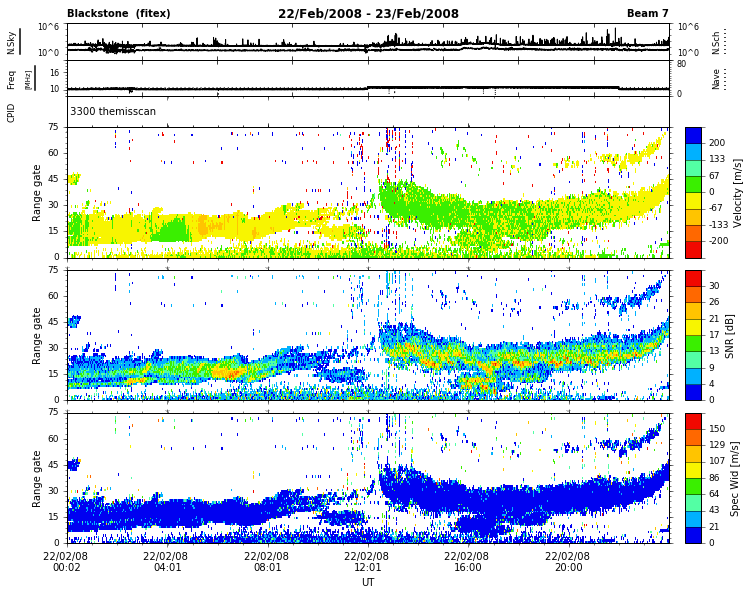

In [7]:
fileName = '/tmp/sd/20080222.000000.20080223.000000.bks.fitex'
fileType = 'fitex'
radar = 'bks'
beam  = 7
sTime = datetime.datetime(2008,2,22)
eTime = datetime.datetime(2008,2,23)

fig = plt.figure(figsize=(14,12)) #Define a figure with a custom size.
pydarn.plotting.rti.plotRti(sTime, radar, eTime=eTime, bmnum=beam, fileName=fileName,fileType=fileType)
plt.show()

In [8]:
fig.clear() #Clear the figure from memory.

# Fan Plots

Right now we don't have plotFan setup to accept local files.  But, we will add that in shortly.

## Geopgraphic Coordinates

/home/w2naf/code/matplotlib/lib/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


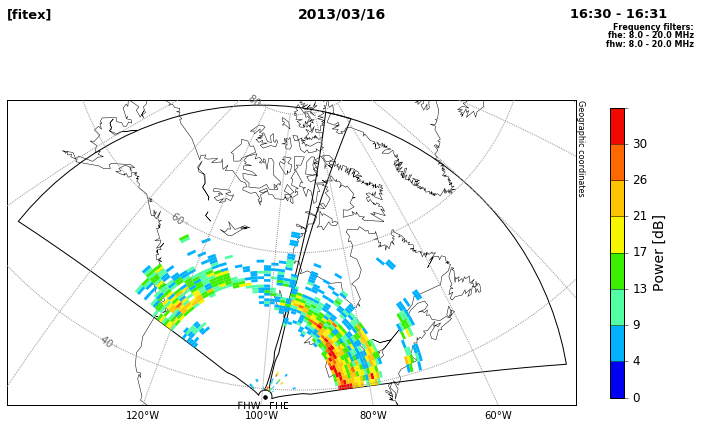

In [9]:
import datetime
import os
import matplotlib.pyplot as plt
from davitpy import pydarn

pydarn.plotting.fan.plotFan(datetime.datetime(2013,3,16,16,30),['fhe','fhw'],param='power',gsct=False)

## Magnetic Coordinates

Magnetic coordinates still need a little work.  For instance, high latitude continent lines don't always plot.  Also, we are working on getting Simon's new AACGM system in place (http://dx.doi.org/doi/10.1002/2014JA020264).  Not there yet...

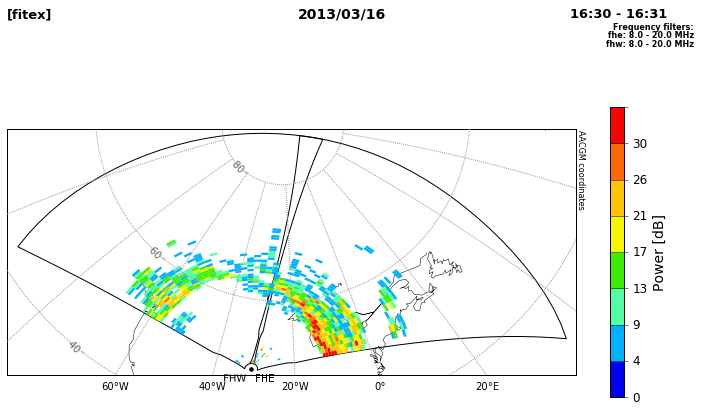

In [10]:
import datetime
import os
import matplotlib.pyplot as plt
from davitpy import pydarn

pydarn.plotting.fan.plotFan(datetime.datetime(2013,3,16,16,30),['fhe','fhw'],param='power',gsct=False,coords='mag')

# Convection Plotting

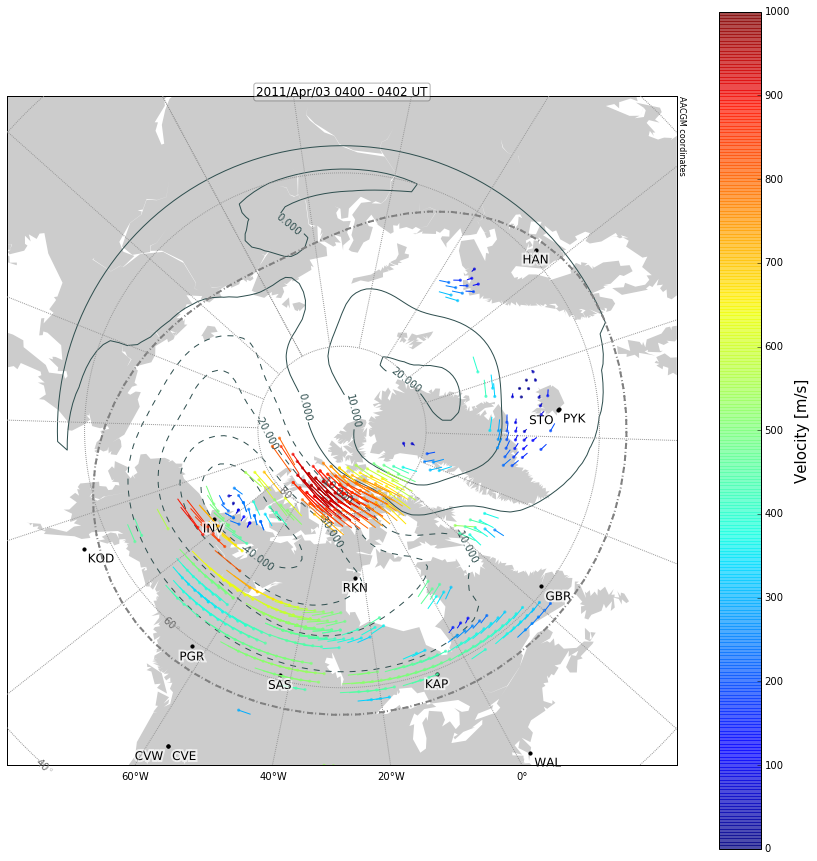

In [11]:
import datetime
import matplotlib.pyplot as plt
import davitpy.pydarn.plotting.plotMapGrd
from davitpy.utils import *

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

sdate = datetime.datetime(2011,4,3,4,0)
mObj = plotUtils.mapObj(boundinglat=50.,gridLabels=True, coords='mag')
mapDatObj = davitpy.pydarn.plotting.plotMapGrd.MapConv(sdate, mObj, ax)
mapDatObj.overlayMapFitVel()
mapDatObj.overlayCnvCntrs()
mapDatObj.overlayHMB()